<a href="https://colab.research.google.com/github/kairamilanifitria/Bootcamp-NLP/blob/main/Weekly_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Pricing Prediction**
### by : **NLP-A (Nikola Tesla)**


In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Understanding

In [ ]:
# Load Dataset from Drive
data = pd.read_csv("/content/drive/MyDrive/Bootcamp AI/Dataset/Boston_Housing/train.csv")

In [ ]:
data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


Explanation:

**ID** : Unique Identifier

**crim** : per capita crime rate by town.

**zn** : proportion of residential land zoned for lots over 25,000 sq.ft.

**indus** : roportion of non-retail business acres per town.

**chas** : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

**nox** : nitrogen oxides concentration (parts per 10 million).

**rm** : average number of rooms per dwelling.

**age** : proportion of owner-occupied units built prior to 1940.

**dis** : weighted mean of distances to five Boston employment centres.

**rad** : index of accessibility to radial highways.

**tax** : full-value property-tax rate per $10,000.

**ptratio** : pupil-teacher ratio by town.

**black** : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

**lstat** : lower status of the population (percent).

**medv** : median value of owner-occupied homes in $1000s.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [ ]:
data.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [ ]:
data.shape

(333, 15)

## 2. Data Cleaning & Analysis

In [ ]:
data.isnull().sum()

,0
ID,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0


There isn't any missing values as shown above. So let's continue to next section

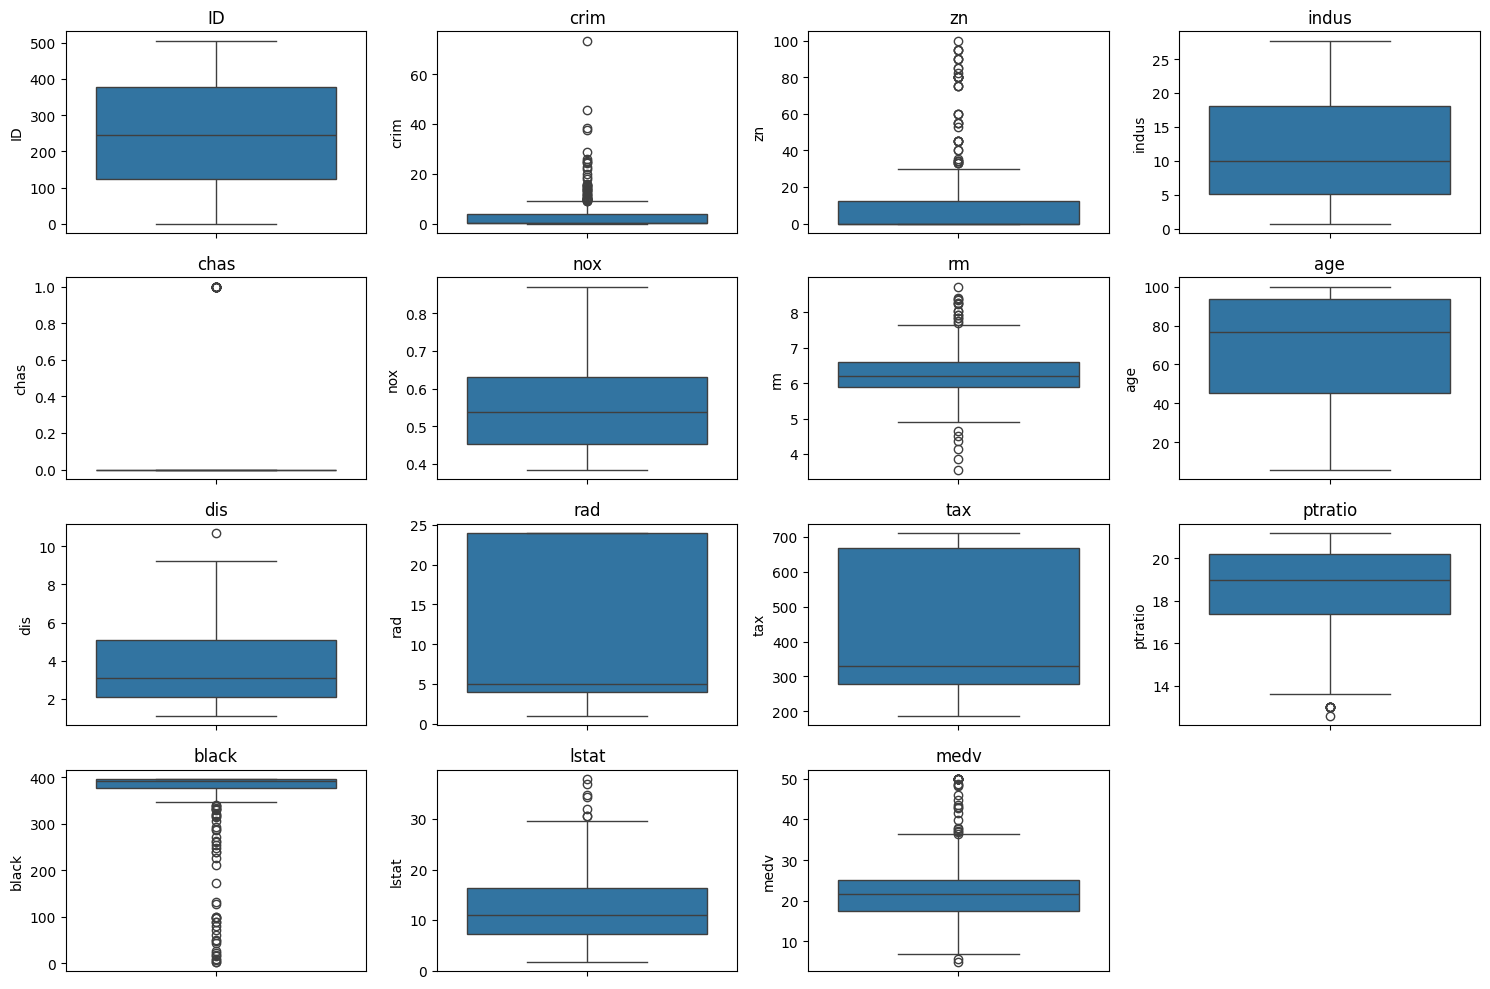

In [ ]:
# Create box plots for each attribute
plt.figure(figsize=(15, 10))

for i, column in enumerate(data.columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()


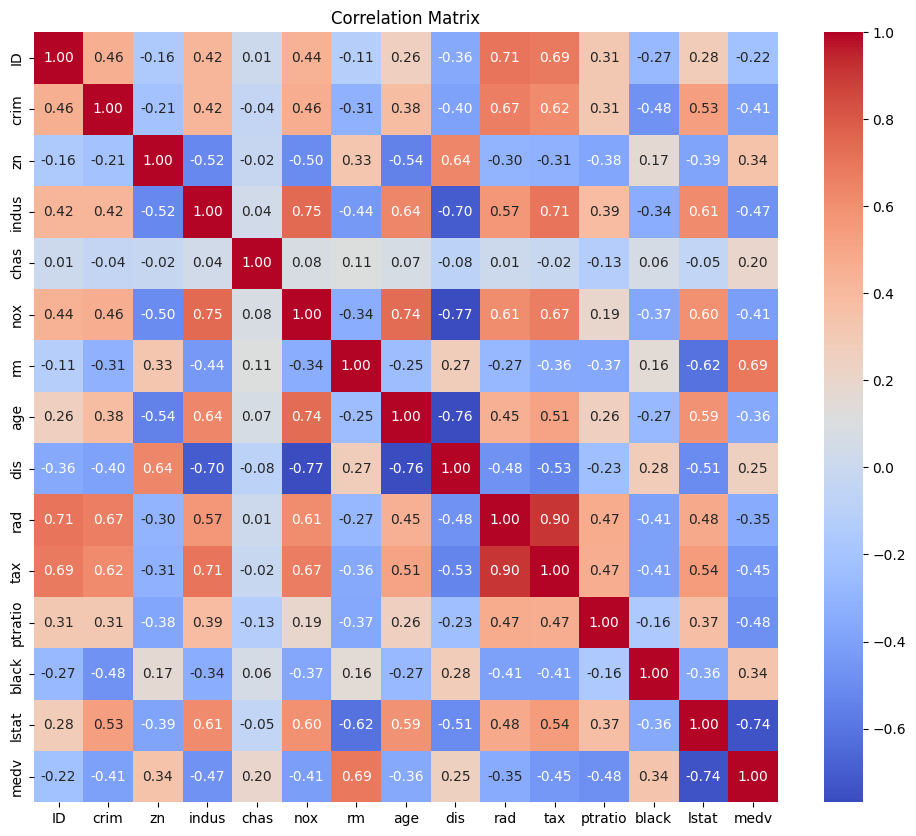

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


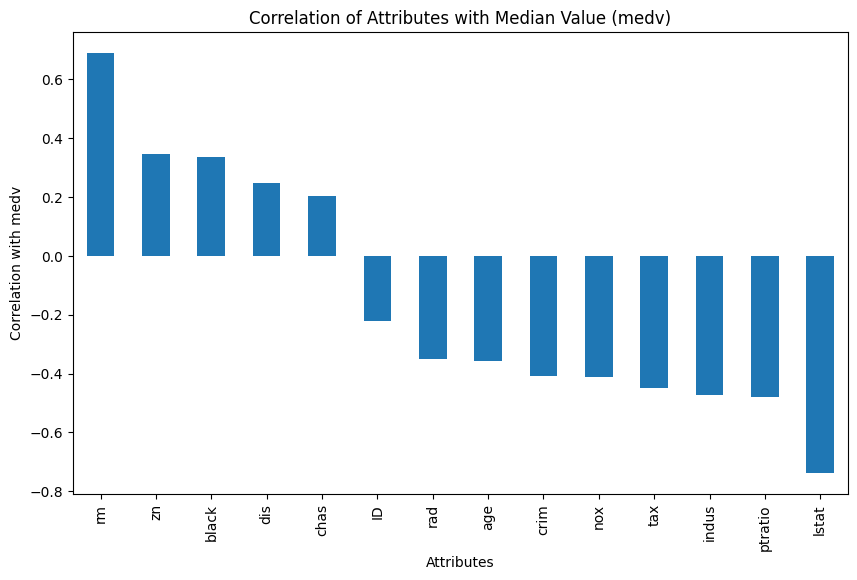

In [ ]:
# Correlation with target variable (medv)
correlation_with_target = correlation_matrix['medv'].drop('medv')

# Visualize correlations with target
plt.figure(figsize=(10, 6))
correlation_with_target.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Attributes')
plt.ylabel('Correlation with medv')
plt.title('Correlation of Attributes with Median Value (medv)')
plt.show()


## 3. Data Modeling

In [ ]:
data_vars = data.columns.values.tolist()
y = ['medv']
X = [i for i in data_vars if i not in y]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[X], data[y], test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (266, 14)
Shape of X_test:  (67, 14)
Shape of y_train:  (266, 1)
Shape of y_test (67, 1)


In [ ]:
y_pred = model.predict(X_test)

## 4. Model Evaluation

In [ ]:
# X_sample = X_train
# y_sample = y_train

# Predict on the sample data
# y_sample_pred = model.predict(X_sample)

In [ ]:
X_sample = X_test
y_sample = y_test

# Predict on the sample data
y_sample_pred = model.predict(X_sample)

In [ ]:
# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Actual MEDV': y_sample.values.flatten(),
                              'Predicted MEDV': y_sample_pred.flatten()})
print(comparison_df)

    Actual MEDV  Predicted MEDV
0          22.9       25.879147
1          28.0       29.305190
2          11.0       14.205491
3          15.4       13.867083
4          22.5       22.481155
..          ...             ...
62         17.4       22.540270
63         12.6       18.556117
64         14.8       15.047207
65         24.4       24.779700
66         50.0       26.831283

[67 rows x 2 columns]


In [ ]:
# Calculate accuracy based on a tolerance
tolerance = 2  # Define a tolerance for acceptable difference

# Count correct predictions within tolerance
correct_predictions = (abs(comparison_df['Actual MEDV'] -
                           comparison_df['Predicted MEDV'])
                           <= tolerance).sum()

# Calculate accuracy percentage
accuracy = (correct_predictions / len(comparison_df)) * 100
print(f"Accuracy within a tolerance of {tolerance}: {accuracy:.2f}%")


Accuracy within a tolerance of 2: 43.28%


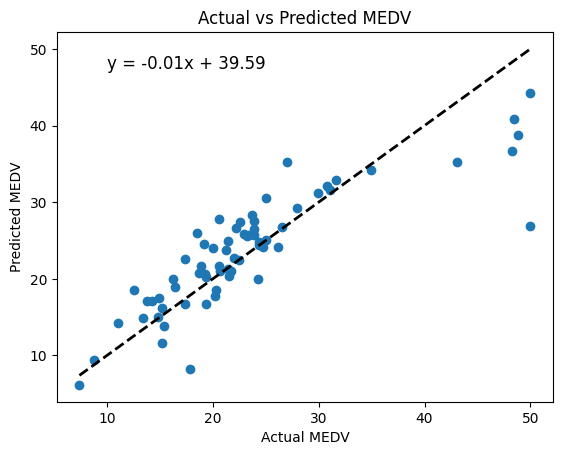

In [ ]:
# Extract coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Create the equation string
equation = f"y = {coefficients[0][0]:.2f}x + {intercept[0]:.2f}"

# Visualize the predictions against actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted MEDV")

# Add the equation to the plot
plt.text(0.1, 0.9, equation, transform=plt.gca().transAxes, fontsize=12)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # line reference
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test, y_pred))
print("R2 score: ",r2_score(y_test, y_pred))

Mean Squared Error:  23.821583889010856
Mean Absolute Error:  3.2893229405345434
R2 score:  0.7290582208058237


## 5. Model Deployment & Maintenance

In [ ]:
import joblib

# Save the model to a file
joblib.dump(model, 'house_price_model.h5')

['house_price_model.h5']

In [ ]:
# Load the test data
test_data = pd.read_csv("/content/drive/MyDrive/Bootcamp AI/Dataset/Boston_Housing/test.csv")

# Load the saved model
loaded_model = joblib.load('house_price_model.h5')

# Make predictions on the test data
y_pred_test = loaded_model.predict(test_data)

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame({'Predicted MEDV': y_pred_test.flatten()})

# Optionally, save the predictions to a CSV file
predictions_df.to_csv('test_predictions.csv', index=False)

# Display the predictions
print(predictions_df)


     Predicted MEDV
0         31.526043
1         26.213688
2         18.861320
3          9.921000
4         18.507698
..              ...
168       15.321735
169       11.955112
170       19.885715
171       18.801997
172       24.731028

[173 rows x 1 columns]


# 6. OTHER METHOD (Trial)

Decision Tree

In [ ]:
import pandas as pd
# Load Dataset from Drive
data = pd.read_csv("/content/drive/MyDrive/Bootcamp AI/Dataset/Boston_Housing/train.csv")

In [ ]:
data_vars = data.columns.values.tolist()
y = ['medv']
X = [i for i in data_vars if i not in y]

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[X], data[y], test_size=0.2, random_state=0)

# Create a Decision Tree Regressor model
model_tree = DecisionTreeRegressor(random_state=0)

# Fit the model to the training data
model_tree.fit(X_train, y_train)

# Make predictions on the test data
y_pred_tree = model_tree.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_squared_error, mean_absolute_error, r2_score

y_pred = model_tree.predict(X_test)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test, y_pred))
print("R2 score: ",r2_score(y_test, y_pred))

Mean Squared Error:  8.671791044776118
Mean Absolute Error:  2.1895522388059696
R2 score:  0.9013688382175277


In [ ]:
X_sample = X_test
y_sample = y_test

# Predict on the sample data
y_sample_pred = model_tree.predict(X_sample)

In [ ]:
# Create a DataFrame for comparison
comparison_tree = pd.DataFrame({'Actual MEDV': y_sample.values.flatten(), 'Predicted MEDV': y_sample_pred.flatten()})
print(comparison_tree)

    Actual MEDV  Predicted MEDV
0          22.9            23.5
1          28.0            26.6
2          11.0            20.0
3          15.4            14.6
4          22.5            20.3
..          ...             ...
62         17.4            15.6
63         12.6            14.1
64         14.8            17.8
65         24.4            17.8
66         50.0            50.0

[67 rows x 2 columns]


In [ ]:
# Calculate accuracy based on a tolerance
tolerance = 2  # Define a tolerance for acceptable difference

# Count correct predictions within tolerance
correct_predictions = (abs(comparison_tree['Actual MEDV'] - comparison_tree['Predicted MEDV']) <= tolerance).sum()

# Calculate accuracy percentage
accuracy = (correct_predictions / len(comparison_tree)) * 100
print(f"Accuracy within a tolerance of {tolerance}: {accuracy:.2f}%")

Accuracy within a tolerance of 2: 62.69%


Random Forest

In [ ]:
# Load Dataset from Drive
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Bootcamp AI/Dataset/Boston_Housing/train.csv")

In [ ]:
data_vars = data.columns.values.tolist()
y = ['medv']
X = [i for i in data_vars if i not in y]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_squared_error, mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(data[X], data[y], test_size=0.2, random_state=0)

# Create a Decision Tree Regressor model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
model_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
print("Random Forest - Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest - R-squared:", r2_score(y_test, y_pred_rf))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest - Mean Squared Error: 8.5984077761194
Random Forest - R-squared: 0.9022034843714346


In [ ]:
X_sample = X_test
y_sample = y_test

# Predict on the sample data
y_sample_pred = model_rf.predict(X_sample)

# Create a DataFrame for comparison
comparison_rf = pd.DataFrame({'Actual MEDV': y_sample.values.flatten(), 'Predicted MEDV': y_sample_pred.flatten()})
print(comparison_rf)

    Actual MEDV  Predicted MEDV
0          22.9          23.335
1          28.0          27.981
2          11.0          14.315
3          15.4          14.176
4          22.5          20.092
..          ...             ...
62         17.4          19.837
63         12.6          15.930
64         14.8          18.285
65         24.4          20.374
66         50.0          40.033

[67 rows x 2 columns]


In [ ]:
# Calculate accuracy based on a tolerance
tolerance = 2  # Define a tolerance for acceptable difference

# Count correct predictions within tolerance
correct_predictions = (abs(comparison_rf['Actual MEDV'] - comparison_rf['Predicted MEDV']) <= tolerance).sum()

# Calculate accuracy percentage
accuracy = (correct_predictions / len(comparison_rf)) * 100
print(f"Accuracy within a tolerance of {tolerance}: {accuracy:.2f}%")

Accuracy within a tolerance of 2: 56.72%


Gradient Boosting

In [ ]:
# Load Dataset from Drive
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Bootcamp AI/Dataset/Boston_Housing/train.csv")

In [ ]:
data_vars = data.columns.values.tolist()
y = ['medv']
X = [i for i in data_vars if i not in y]

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_squared_error, mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(data[X], data[y], test_size=0.2, random_state=0)

# Create a Decision Tree Regressor model
model_gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model to the training data
model_gbm.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gbm = model_gbm.predict(X_test)

# Evaluate the model
print("Gradient Boosting - Mean Squared Error:", mean_squared_error(y_test, y_pred_gbm))
print("Gradient Boosting - R-squared:", r2_score(y_test, y_pred_gbm))

Gradient Boosting - Mean Squared Error: 8.388871195939739
Gradient Boosting - R-squared: 0.904586710193221


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X_sample = X_test
y_sample = y_test

# Predict on the sample data
y_sample_pred = model_gbm.predict(X_sample)

# Create a DataFrame for comparison
comparison_gbm = pd.DataFrame({'Actual MEDV': y_sample.values.flatten(), 'Predicted MEDV': y_sample_pred.flatten()})
print(comparison_gbm)

    Actual MEDV  Predicted MEDV
0          22.9       22.919405
1          28.0       27.895284
2          11.0       10.776231
3          15.4       14.120738
4          22.5       20.135337
..          ...             ...
62         17.4       19.328438
63         12.6       15.831745
64         14.8       16.102758
65         24.4       21.141191
66         50.0       38.325484

[67 rows x 2 columns]


In [ ]:
# Calculate accuracy based on a tolerance
tolerance = 2  # Define a tolerance for acceptable difference

# Count correct predictions within tolerance
correct_predictions = (abs(comparison_gbm['Actual MEDV'] - comparison_gbm['Predicted MEDV']) <= tolerance).sum()

# Calculate accuracy percentage
accuracy = (correct_predictions / len(comparison_gbm)) * 100
print(f"Accuracy within a tolerance of {tolerance}: {accuracy:.2f}%")

Accuracy within a tolerance of 2: 68.66%


Linear Regression

In [ ]:
# Load Dataset from Drive
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Bootcamp AI/Dataset/Boston_Housing/train.csv")

In [ ]:
data_vars = data.columns.values.tolist()
y = ['medv']
X = [i for i in data_vars if i not in y]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_squared_error, mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(data[X], data[y], test_size=0.2, random_state=0)

# Create a Decision Tree Regressor model
model_linear = LinearRegression()

# Fit the model to the training data
model_linear.fit(X_train, y_train)

# Make predictions on the test data
y_pred_linear = model_linear.predict(X_test)

# Evaluate the model
print("Linear Regression - Mean Squared Error:", mean_squared_error(y_test, y_pred_linear))
print("Linear Regression - R-squared:", r2_score(y_test, y_pred_linear))


Linear Regression - Mean Squared Error: 23.821583889010856
Linear Regression - R-squared: 0.7290582208058237


In [ ]:
X_sample = X_test
y_sample = y_test

# Predict on the sample data
y_sample_pred = model_linear.predict(X_sample)

# Create a DataFrame for comparison
comparison_linear = pd.DataFrame({'Actual MEDV': y_sample.values.flatten(), 'Predicted MEDV': y_sample_pred.flatten()})
print(comparison_linear)

    Actual MEDV  Predicted MEDV
0          22.9       25.879147
1          28.0       29.305190
2          11.0       14.205491
3          15.4       13.867083
4          22.5       22.481155
..          ...             ...
62         17.4       22.540270
63         12.6       18.556117
64         14.8       15.047207
65         24.4       24.779700
66         50.0       26.831283

[67 rows x 2 columns]


In [ ]:
# Calculate accuracy based on a tolerance
tolerance = 2  # Define a tolerance for acceptable difference

# Count correct predictions within tolerance
correct_predictions = (abs(comparison_linear['Actual MEDV'] - comparison_linear['Predicted MEDV']) <= tolerance).sum()

# Calculate accuracy percentage
accuracy = (correct_predictions / len(comparison_linear)) * 100
print(f"Accuracy within a tolerance of {tolerance}: {accuracy:.2f}%")

Accuracy within a tolerance of 2: 43.28%
